In [1]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## 28/12/22

## Kurtosis

- Taking normal distribution

In [2]:
x=np.random.normal(loc=50,scale=5,size=100000)

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

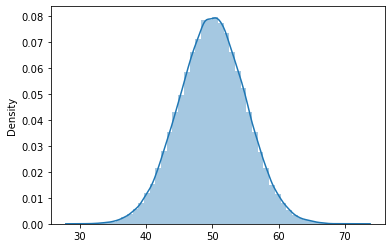

In [3]:
sns.distplot(x)

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

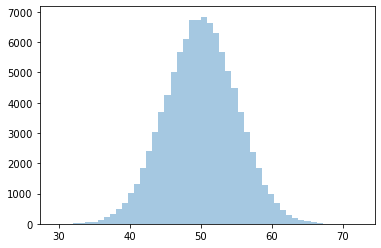

In [4]:
sns.distplot(x,kde=False)

(array([5.1000e+01, 7.6700e+02, 5.3500e+03, 1.8395e+04, 3.2073e+04,
        2.8174e+04, 1.2250e+04, 2.6210e+03, 3.0700e+02, 1.2000e+01]),
 array([29.42708272, 33.71390545, 38.00072818, 42.28755091, 46.57437364,
        50.86119637, 55.14801911, 59.43484184, 63.72166457, 68.0084873 ,
        72.29531003]),
 <BarContainer object of 10 artists>)

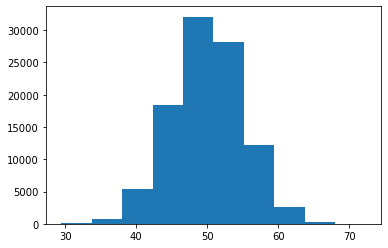

In [5]:
plt.hist(x)

In [6]:
st.kurtosis(x)  ## by default gives excess kurtosis

-0.013109794638714867

### To see standard answer do Fisher=False

In [7]:
st.kurtosis(x,fisher=False) 

2.986890205361285

In [8]:
st.skew(x)

-0.008840542306270136

In [9]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


HW : Find the skewness of each species of sepal length and sepal width

    identify whether the tip distribution is symmetrical or not
    find the 25 30 90percentile of sepal length width of each species
    whether the petal length of setosa species lecto,meso,plato kurtic?

### How to detect the distribution is normally distributed?

In [11]:
np.mean(x)

50.00874939510209

In [12]:
st.mode(x)

ModeResult(mode=array([29.42708272]), count=array([1]))

In [13]:
 np.median(x)

50.0295426432026

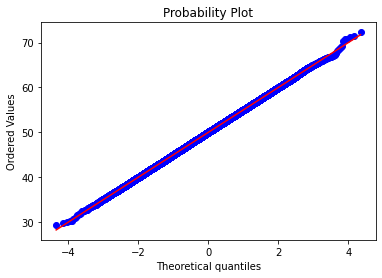

In [14]:
import pylab
st.probplot(x,dist="norm",plot=pylab);
## If data points are lying on the line than it is normally distributed

- If any distribution is not normal then how to transfer it to normal

Log transformation : right skewed

Box cox : most acceptable : if data > 0

Power transformation : 

yeo johnson if data=0 this also apply , positive and negative too

Reciprocal

In [15]:
df=sns.load_dataset("titanic")

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


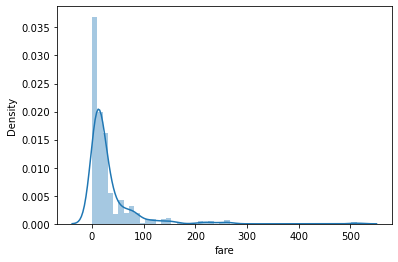

In [16]:
sns.distplot(df["fare"]);  ## right skewed

In [17]:
df["fare"].skew()

4.787316519674893

- since fare is right skewed so implement log transform

In [18]:
import scipy.stats as st

In [19]:
np.log(df["fare"])

C:\Users\rupan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: fare, Length: 891, dtype: float64

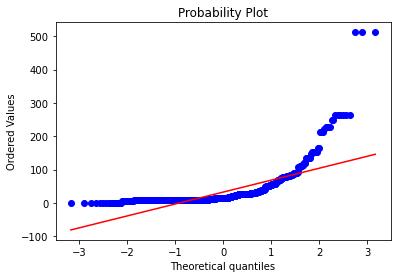

In [20]:
st.probplot(df["fare"],dist="norm",plot=pylab);

- Since fare is right skewed, so implement log transform

- Not normally distributed, we will make it normally distributed

In [21]:
from sklearn.preprocessing import FunctionTransformer  ## machine learning library
import numpy as np

In [22]:
f=FunctionTransformer(func=np.log1p)

In [23]:
fare1=f.fit_transform(df["fare"])
fare1

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

((array([-3.16416595e+00, -2.89636677e+00, -2.74675222e+00, -2.64114608e+00,
         -2.55870259e+00, -2.49067391e+00, -2.43252738e+00, -2.38160005e+00,
         -2.33618969e+00, -2.29513992e+00, -2.25762808e+00, -2.22304736e+00,
         -2.19093694e+00, -2.16093830e+00, -2.13276686e+00, -2.10619283e+00,
         -2.08102787e+00, -2.05711563e+00, -2.03432484e+00, -2.01254418e+00,
         -1.99167841e+00, -1.97164537e+00, -1.95237369e+00, -1.93380097e+00,
         -1.91587229e+00, -1.89853909e+00, -1.88175821e+00, -1.86549107e+00,
         -1.84970311e+00, -1.83436318e+00, -1.81944313e+00, -1.80491744e+00,
         -1.79076290e+00, -1.77695830e+00, -1.76348425e+00, -1.75032296e+00,
         -1.73745806e+00, -1.72487445e+00, -1.71255819e+00, -1.70049636e+00,
         -1.68867698e+00, -1.67708890e+00, -1.66572174e+00, -1.65456583e+00,
         -1.64361212e+00, -1.63285214e+00, -1.62227795e+00, -1.61188210e+00,
         -1.60165759e+00, -1.59159783e+00, -1.58169661e+00, -1.57194806e+00,

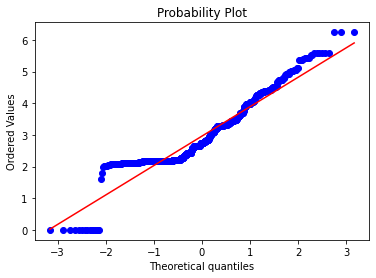

In [24]:
fare11=st.probplot(fare1,dist="norm",plot=plt);
fare11

In [27]:
st.skew(df["fare"])

4.7792532923723545

In [25]:
 st.skew(fare1)

0.39426283638993376

- Skewness has been reduced from 4.7792532923723545 to 0.39426283638993376 that means our column has been transformed 